In [1]:
import numpy as np
import cv2
import sys

In [2]:
img = cv2.imread('./Ch_1_Opencv_Intro/fig/puppy.bmp')

if img is None:
    print('image read failed')
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image', img)

while True:
    if cv2.waitKey() == 27:
        break
        
cv2.destroyAllWindows()

In [3]:
img1 = np.zeros((400, 600, 3), np.uint8)
img2 = np.ones((400, 600, 3), np.uint8)*255
cv2.circle(img1, (200, 300), 50, (0,0,255), -1)


cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.destroyAllWindows()
           

In [6]:
##동영상

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    cap.release()
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")
    
out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('image read failed')
        break
        
#     img = cv2.imread(frame)
    
    cv2.imshow('frame', frame)
    out.write(frame)
    
    
    if cv2.waitKey(20) ==  27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [8]:
##
oldx = oldy = -1

def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event ==  cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255),
                    3, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y


img = np.ones((600, 1200, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
def call_track(pos):
    img[:] = pos
    cv2.imshow('image', img)


img = np.ones((600, 1200), np.uint8)

cv2.imshow('image', img)
cv2.createTrackbar('LEVEL', 'image', 10, 255, call_track)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
src1 = cv2.imread('Ch_3_Basic_img_proc/fig/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((256, 256), dtype = np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)
dst5 = cv2.divide(src1, src2, scale = 255)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('add', dst1)
cv2.imshow('weighted', dst2)
cv2.imshow('subtract', dst3)
cv2.imshow('abs', dst4)
cv2.imshow('divide', dst5)


cv2.waitKey()
cv2.destroyAllWindows()

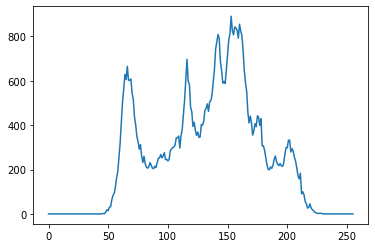

In [5]:
import matplotlib.pyplot as plt

src = cv2.imread('Ch_3_Basic_img_proc/fig/lenna256.bmp')
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist

hist1 = cv2.calcHist([src], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([src], [1], None, [256], [0, 256])
hist3 = cv2.calcHist([src], [2], None, [256], [0, 256])


cv2.imshow('src', src)
plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
src = cv2.imread('Ch_4_Histogram_modi/fig/candies.png', 1)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst = cv2.inRange(src_hsv, (40, 150, 0), (70, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst', dst)



cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
## 히스토그램 역투영

src = cv2.imread('Ch_4_Histogram_modi/fig/green.png', cv2.IMREAD_REDUCED_COLOR_2)

x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

# # cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist = cv2.calcHist([crop], [1, 2], None, [256, 256], [0, 256, 0, 256])

# # calcBackProject(images, channels, hist, ranges, scale[, dst]) -> dst
backproj = cv2.calcBackProject([src_ycrcb], [1, 2], hist,
                              [0, 256, 0, 256], 1)

dst = cv2.copyTo(src, backproj)


cv2.imshow('src', src)
cv2.imshow('crop', crop)
cv2.imshow('hist', hist)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


153 395 65 12


In [41]:
def call_track(pos):
    global dst_hsv, dst
    
    hmin = cv2.getTrackbarPos('hmin', 'mask')
    hmax = cv2.getTrackbarPos('hmax', 'mask')
    smin = cv2.getTrackbarPos('smin', 'mask')
    
    dst_mask = cv2.inRange(dst_hsv, (hmin, smin, 0),
                          (hmax, 255, 255))
    dst1 = dst.copy()
    cv2.copyTo(src, dst_mask, dst1)
    cv2.imshow('mask', dst_mask)
    cv2.imshow('dst', dst1)
    
    

src = cv2.imread('Ch_4_Histogram_modi/fig/autumn.jpg')
dst = cv2.imread('Ch_4_Histogram_modi/fig/chromakey.png')

h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), interpolation = cv2.INTER_AREA)
dst_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

cv2.namedWindow('mask')
cv2.createTrackbar('hmin', 'mask', 30, 255, call_track)
cv2.createTrackbar('hmax', 'mask', 50, 255, call_track)
cv2.createTrackbar('smin', 'mask', 0, 255, call_track)

# mask = cv2.inRange(dst_hsv, (50, 150, 0), (80, 255, 255))
# cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
